## Importing libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None);

## Loading Data

In [84]:
df = pd.read_csv('crystal_data.csv')
df.shape

(5329, 18)

### Columns
Compound - Compound name
<br>A - First element
<br>B - Second element
<br>In literature - Boolean True or False
<br>v(A) - Valency of A
<br>v(B) - Valency of B
<br>r(AXII)(Å) - Ionic radius of A cation
<br>r(AVI)(Å) - Ionic radius of B cation
<br>EN(A) - Average electronegativity value of A cation
<br>EN(B) - Average electronegativity value of B cation


In [85]:
df.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


## Data Cleaning and Pre processing

### Checking for null values

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound           5329 non-null   object 
 1   A                  5329 non-null   object 
 2   B                  5329 non-null   object 
 3   In literature      5329 non-null   bool   
 4   v(A)               5329 non-null   object 
 5   v(B)               5329 non-null   object 
 6   r(AXII)(Å)         5329 non-null   float64
 7   r(AVI)(Å)          5329 non-null   float64
 8   r(BVI)(Å)          5329 non-null   float64
 9   EN(A)              5329 non-null   float64
 10  EN(B)              5329 non-null   float64
 11  l(A-O)(Å)          5329 non-null   float64
 12  l(B-O)(Å)          5329 non-null   float64
 13  ΔENR               5329 non-null   float64
 14  tG                 5329 non-null   float64
 15  τ                  5329 non-null   object 
 16  μ                  5329 

There is not any 'NaN' value in the dataset but it seem there are lots of dashes('-') present in the different columns 

In [87]:
(df == '-').sum()

Compound                0
A                       0
B                       0
In literature           0
v(A)                 1881
v(B)                 1881
r(AXII)(Å)              0
r(AVI)(Å)               0
r(BVI)(Å)               0
EN(A)                   0
EN(B)                   0
l(A-O)(Å)               0
l(B-O)(Å)               0
ΔENR                    0
tG                      0
τ                    3143
μ                       0
Lowest distortion      53
dtype: int64

 From here it's clear that dashes are present in 'v(A)', 'v(B), 'τ', and 'Lowest distortion' columns.
* 'Lowest distortion' is going to be our target column we can use entries with '-' in our testing phase, hence no need to think about handling of this column's data or we can also just remove these rows as the number of '-' is just 53 and we can't predict that our prediction is correct or not corresponding to these columns.<br>
* In case of 'τ' more than 50% of the entries are not present, that's why better than handling we should drop this column otherwise this can affect our results. 

In [88]:
df = df.drop(["τ"], axis=1)
df.columns

Index(['Compound', 'A', 'B', 'In literature', 'v(A)', 'v(B)', 'r(AXII)(Å)',
       'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)',
       'ΔENR', 'tG', 'μ', 'Lowest distortion'],
      dtype='object')

In [89]:
print(len(df["v(A)"].unique()))
print(len(df["v(B)"].unique()))

7
7


In [90]:
val_a = pd.get_dummies(df['v(A)'], prefix="v(A)=", prefix_sep="")
val_b = pd.get_dummies(df['v(B)'], prefix="v(B)=", prefix_sep="")
df = pd.concat([df, val_a, val_b], axis=1)

In [91]:
df = df.drop(["v(A)"], axis=1)
df = df.drop(["v(B)"], axis=1)
df.columns

Index(['Compound', 'A', 'B', 'In literature', 'r(AXII)(Å)', 'r(AVI)(Å)',
       'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG',
       'μ', 'Lowest distortion', 'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2',
       'v(A)=3', 'v(A)=4', 'v(A)=5', 'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2',
       'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

In [92]:
df = df.drop(["In literature"], axis=1)
df = df.drop(["Compound"], axis=1)
df.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'μ', 'Lowest distortion',
       'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2', 'v(A)=3', 'v(A)=4', 'v(A)=5',
       'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2', 'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

In [93]:
a_ = pd.get_dummies(df['A'], prefix="A=", prefix_sep="")
b_ = pd.get_dummies(df['B'], prefix="B=", prefix_sep="")
df = pd.concat([df, a_, b_], axis=1)

In [94]:
df = df.drop(["A"], axis=1)
df = df.drop(["B"], axis=1)

In [95]:
df = df.drop(df[df["Lowest distortion"] == "-"].index)

In [96]:
(df == '-').sum().sum()

0

## Modelling

In [97]:
features = df.drop(labels=["Lowest distortion"], axis=1)
target = df["Lowest distortion"]

In [98]:
from sklearn.model_selection import train_test_split

SEED = 0
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

### Random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [100]:
accuracy1 = round(rf.score(X_test, y_test) * 100, 2)
print(f"Accuracy of the SVC: {accuracy1}%")

Accuracy of the SVC: 79.07%


### SVM

In [101]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [102]:
accuracy2 = round(model.score(X_test, y_test) * 100, 2)
print(f"Accuracy of the SVC: {accuracy2}%")


Accuracy of the SVC: 68.66%


### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred3 = dtree.predict(X_test)

In [104]:
accuracy3 = round(dtree.score(X_test, y_test) * 100, 2)
print(f"Accuracy of the dtree: {accuracy3}%")

Accuracy of the dtree: 73.2%


## Results


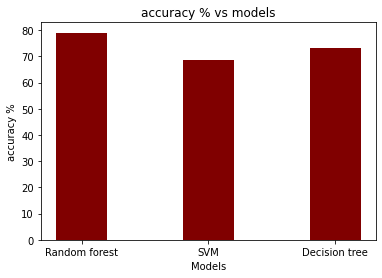

In [105]:
X =  list(["Random forest","SVM","Decision tree"])
Y =  list([accuracy1, accuracy2, accuracy3])

plt.bar(X, Y, color ='maroon',width = 0.4)

plt.xlabel("Models")
plt.ylabel("accuracy %")
plt.title("accuracy % vs models")
plt.show()